# Sklearn

## sklearn.linear_model

In [0]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, linear_model, metrics
from sklearn import model_selection as cross_validation 

import numpy as np

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [0]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

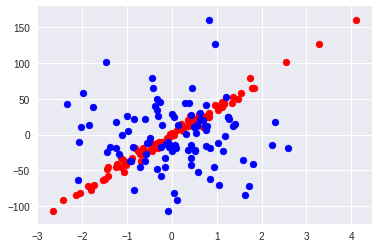

In [0]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [0]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)
print(train_labels)

[ 58.26281761  22.2276832  -32.71074998 -24.77820218   0.34799656
  64.70214251  24.82763821  14.76930132 -16.85466265  10.33267887
  29.8208999   24.47584129 101.14760598 -11.18242389 -22.32195021
 -42.44469577  51.87072011  12.67156468 -21.47606913 -91.477377
  45.05465366 -15.01435792  -4.38652971  41.95683853  11.96165156
 -84.32102748 -14.97110322 -22.33224966 -18.57607726  44.66274342
 -52.37232463 -40.84204295  22.13032804 -16.30914909 -36.44717565
  27.83791274  21.20540389 160.09441244 -35.32062686 -45.27502383
  49.41686419 -22.64686884  39.70663436 -76.75213382  25.24428409
   4.45578287  12.47089016  17.64282734 -63.4056294   11.74073026
 -71.3715844  -44.51417742 -10.06708677   1.72644759  25.7124082
 -70.11132234  41.1068411  -16.79027112  78.24817537  20.87713077
 -12.98848753 -21.48288019 -26.87743177  28.15553021  -0.74051877
  38.36241814  23.87701013 -10.29545833 -13.99339669  44.41658249]


#### LinearRegression

In [0]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [0]:
print test_labels

[-63.4056294  -71.3715844  -13.26392817 -14.97110322  78.24817537
  12.47089016  58.26281761  22.13032804 -26.87743177  19.66406455
 -10.06708677 -52.37232463  44.41658249  14.76930132 -22.33224966
 -45.38589148  12.67156468 -32.92158843  34.35183007 -35.32062686
 -13.99339669   5.86887774 -76.75213382  41.1068411   41.95683853
  21.20540389 -57.46293828 -16.79027112 -16.30914909 -21.47606913]


In [0]:
print predictions

[-58.852943   -71.11507146 -16.18796227 -12.67858298  65.4403419
  19.37133172  57.5421555   19.96759589 -27.61046918  25.87213831
  -9.00262805 -40.55817331  43.47527017   7.2493378  -28.70945876
 -43.3008168   13.96048253 -33.62907705  38.63734378 -42.02112391
 -14.85897386   4.26636712 -68.21867053  35.87450642  44.00750187
  15.92257002 -54.07071011 -14.63385798 -12.30769475 -17.91045621]


In [0]:
metrics.mean_absolute_error(test_labels, predictions)

3.9675404182652723

In [0]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: -4.07007149878, std: 1.07371044929


In [0]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [0]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 4.07007149878, std: 1.07371044929


In [0]:
coef

array([38.07925837,  0.        ])

In [0]:
linear_regressor.coef_

array([ 3.78107291e+01, -2.86203953e-02])

In [0]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.43165457326268203

In [0]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [0]:
print "y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_)

y = 37.81*x1 + -0.03*x2 + -0.43


#### Lasso

In [0]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [0]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

mean: 4.15447824667, std: 1.0170354385


In [0]:
print lasso_regressor.coef_

[37.10645622 -0.        ]


In [0]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [0]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

y = 37.11*x1 + -0.00*x2
